In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

%matplotlib inline

# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
raw_data = pd.read_csv('tweets.csv', encoding='ISO-8859-1')
raw_data.head()

username        date  \
0  shivaji_takey  10-06-2020   
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions  
0  Please check what happens to this no 940417705...  ['vodafonein']  
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']  
2  This has been going on since 3rd... this absol...  ['vodafonein']  
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']  
4  But when???Still I am not received any call fr...  ['vodafonein']

In [3]:
data = raw_data.copy()
data.tail()

username        date  \
21042       mvjdobhal  31-05-2020   
21043  valleyofpeace2  31-05-2020   
21044  mushtabaarshad  31-05-2020   
21045        gouravgv  31-05-2020   
21046       v_manoj19  31-05-2020   

                                                   tweet  \
21042  I sent u my contact no. But still did not get ...   
21043  dear @VodafoneIN  i have bn facing ur network ...   
21044  rubbish i made many time @VodafoneIN  you didn...   
21045  Why the caller tunes sound so horrible? if a s...   
21046  @VodafoneIN @idea_cares what nonsense are u gu...   

                                                mentions  
21042                                     ['vodafonein']  
21043                                     ['vodafonein']  
21044                                     ['vodafonein']  
21045  ['airtelindia', 'idea', 'vodafonein', 'bsnlcor...  
21046                       ['vodafonein', 'idea_cares']

In [4]:
data.shape

(21047, 4)

In [5]:
data['tweet'][0]

'Please check what happens to this no 9404177052 not in woking since lockdown. Maharashtra.'

In [6]:
data.nunique()

username    10724
date           11
tweet       21047
mentions     4704
dtype: int64

## Data Cleaning

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt) 
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

### Remove any @ mentions

In [8]:
data['Clean_text'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
data['Clean_text'].head(10)

0    Please check what happens to this no 940417705...
1    Network fluctuations and 4G Speed is pathetic....
2    This has been going on since 3rd... this absol...
3      I have done my recharge of 555 on 9709333370...
4    But when???Still I am not received any call fr...
5     mere area me vodafone ka network nai aa raha ...
6    Thanks, but I have visited the website, called...
7     \nHi,\n Today my Vodafone cim is deactivated ...
8    Dear Vodafone, I have already responded to you...
9     SIR OUR MARKET AREA ME BILKUL NETWORK NAHI AA...
Name: Clean_text, dtype: object

`np.vectorize` is another way of writing a `for_loop`. It will loop through all the tweets data in the dataframe.

In [9]:
data['Clean_text'] = data['Clean_text'].str.replace("[^a-zA-Z#]", " ") 
data['Clean_text'].head(10)

0    Please check what happens to this no          ...
1    Network fluctuations and  G Speed is pathetic ...
2    This has been going on since  rd    this absol...
3      I have done my recharge of     on           ...
4    But when   Still I am not received any call fr...
5     mere area me vodafone ka network nai aa raha ...
6    Thanks  but I have visited the website  called...
7      Hi   Today my Vodafone cim is deactivated wi...
8    Dear Vodafone  I have already responded to you...
9     SIR OUR MARKET AREA ME BILKUL NETWORK NAHI AA...
Name: Clean_text, dtype: object

In [10]:
data['Clean_text'] = data['Clean_text'].str.lower()
data['Clean_text'].head(10)

0    please check what happens to this no          ...
1    network fluctuations and  g speed is pathetic ...
2    this has been going on since  rd    this absol...
3      i have done my recharge of     on           ...
4    but when   still i am not received any call fr...
5     mere area me vodafone ka network nai aa raha ...
6    thanks  but i have visited the website  called...
7      hi   today my vodafone cim is deactivated wi...
8    dear vodafone  i have already responded to you...
9     sir our market area me bilkul network nahi aa...
Name: Clean_text, dtype: object

In [11]:
data['Clean_text'] = data['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
data.head()

username        date  \
0  shivaji_takey  10-06-2020   
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions  \
0  Please check what happens to this no 940417705...  ['vodafonein']   
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']   
2  This has been going on since 3rd... this absol...  ['vodafonein']   
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']   
4  But when???Still I am not received any call fr...  ['vodafonein']   

                                          Clean_text  
0  please check what happens this not woking sinc...  
1  network fluctuations and speed pathetic need j...  
2  this has been going since this absolutely unpr...  
3  have done recharge but haven got perday with u...  
4  but when still not received any call from cust...

The `lambda` function splits the text into words and then joins all words that have more than 2 characters with a space in between.

## Tokenization of the dataset

In [12]:
tokenized_tweet = data['Clean_text'].apply(lambda x: x.split())
tokenized_tweet.tail(10)

21037                         [airtel, better, than, voda]
21038    [unfortunately, this, not, going, line, with, ...
21039    [haven, got, any, surprise, moreover, haven, g...
21040    [please, check, have, sent, the, numbers, plea...
21041    [sorry, say, but, you, was, kidding, last, hou...
21042    [sent, contact, but, still, did, not, get, res...
21043    [dear, have, facing, network, problem, for, fe...
21044    [rubbish, made, many, time, you, didn, resolve...
21045    [why, the, caller, tunes, sound, horrible, son...
21046    [what, nonsense, are, guys, saying, getting, a...
Name: Clean_text, dtype: object

In [13]:
tokenized_tweet.head()

0    [please, check, what, happens, this, not, woki...
1    [network, fluctuations, and, speed, pathetic, ...
2    [this, has, been, going, since, this, absolute...
3    [have, done, recharge, but, haven, got, perday...
4    [but, when, still, not, received, any, call, f...
Name: Clean_text, dtype: object

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
data['Clean_text'] = tokenized_tweet
data.head(10)

username        date  \
0    shivaji_takey  10-06-2020   
1    sarasberiwala  10-06-2020   
2       chitreamod  10-06-2020   
3     sanjan_suman  10-06-2020   
4         t_nihsit  10-06-2020   
5        tanzeelu3  10-06-2020   
6       chitreamod  10-06-2020   
7  mayankpatel7293  10-06-2020   
8       deeranjith  10-06-2020   
9   govindrathi799  10-06-2020   

                                               tweet  \
0  Please check what happens to this no 940417705...   
1  Network fluctuations and 4G Speed is pathetic....   
2  This has been going on since 3rd... this absol...   
3  @VodafoneIN  I have done my recharge of 555 on...   
4  But when???Still I am not received any call fr...   
5  @VodafoneIN mere area me vodafone ka network n...   
6  Thanks, but I have visited the website, called...   
7  @VodafoneIN @VodafoneGroup\nHi,\n Today my Vod...   
8  Dear Vodafone, I have already responded to you...   
9  @VodafoneIN SIR OUR MARKET AREA ME BILKUL NETW...   

                                            mentions  \
0                                     ['vodafonein']   
1                                     ['vodafonein']   
2                                     ['vodafonein']   
3                                     ['vodafonein']   
4                                     ['vodafonein']   
5                                     ['vodafonein']   
6                                     ['vodafonein']   
7  ['vodafonein', 'vodafonegroup', 'trai', 'trai_...   
8                                     ['vodafonein']   
9                                     ['vodafonein']   

                                          Clean_text  
0  please check what happens this not woking sinc...  
1  network fluctuations and speed pathetic need j...  
2  this has been going since this absolutely unpr...  
3  have done recharge but haven got perday with u...  
4  but when still not received any call from cust...  
5  mere area vodafone network nai raha hai bhitol...  
6  thanks but have visited the website called you...  
7  today vodafone cim deactivated without any inf...  
8  dear vodafone have already responded your repl...  
9  sir our market area bilkul network nahi raha c...

In [15]:
data.loc[:, ('Clean_text')].head()

0    please check what happens this not woking sinc...
1    network fluctuations and speed pathetic need j...
2    this has been going since this absolutely unpr...
3    have done recharge but haven got perday with u...
4    but when still not received any call from cust...
Name: Clean_text, dtype: object

In [16]:
data.drop_duplicates(subset=['Clean_text'], keep='first', inplace=True)

data.reset_index(drop=True, inplace=True)
data.head()

username        date  \
0  shivaji_takey  10-06-2020   
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions  \
0  Please check what happens to this no 940417705...  ['vodafonein']   
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']   
2  This has been going on since 3rd... this absol...  ['vodafonein']   
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']   
4  But when???Still I am not received any call fr...  ['vodafonein']   

                                          Clean_text  
0  please check what happens this not woking sinc...  
1  network fluctuations and speed pathetic need j...  
2  this has been going since this absolutely unpr...  
3  have done recharge but haven got perday with u...  
4  but when still not received any call from cust...

In [17]:
data['Clean_text_length'] = data['Clean_text'].apply(len)
data.head()

username        date  \
0  shivaji_takey  10-06-2020   
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions  \
0  Please check what happens to this no 940417705...  ['vodafonein']   
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']   
2  This has been going on since 3rd... this absol...  ['vodafonein']   
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']   
4  But when???Still I am not received any call fr...  ['vodafonein']   

                                          Clean_text  Clean_text_length  
0  please check what happens this not woking sinc...                 68  
1  network fluctuations and speed pathetic need j...                 78  
2  this has been going since this absolutely unpr...                 56  
3  have done recharge but haven got perday with u...                178  
4  but when still not received any call from cust...                 74

In [18]:
data[data['Clean_text_length'] == 0]

username        date        tweet                       mentions  \
20  omanmessi  10-06-2020  @VodafoneIN  ['ooredoooman', 'vodafonein']   

   Clean_text  Clean_text_length  
20                             0

In [19]:
raw_data[raw_data['username']== 'omanmessi']

username        date        tweet                       mentions
20  omanmessi  10-06-2020  @VodafoneIN  ['ooredoooman', 'vodafonein']

In [20]:
# this was just a tweets with hashtags
data[data['Clean_text_length'] == 0]['Clean_text'] 
# we can just drop it
indexes = data[data['Clean_text_length']==0].index
indexes

20    
Name: Clean_text, dtype: object

Int64Index([20], dtype='int64')

In [21]:
data.drop(index = indexes, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19761 entries, 0 to 19761
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           19761 non-null  object
 1   date               19761 non-null  object
 2   tweet              19761 non-null  object
 3   mentions           19761 non-null  object
 4   Clean_text         19761 non-null  object
 5   Clean_text_length  19761 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [22]:
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19761 entries, 0 to 19760
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           19761 non-null  object
 1   date               19761 non-null  object
 2   tweet              19761 non-null  object
 3   mentions           19761 non-null  object
 4   Clean_text         19761 non-null  object
 5   Clean_text_length  19761 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 926.4+ KB


In [23]:
data['Clean_text'].head()

0    please check what happens this not woking sinc...
1    network fluctuations and speed pathetic need j...
2    this has been going since this absolutely unpr...
3    have done recharge but haven got perday with u...
4    but when still not received any call from cust...
Name: Clean_text, dtype: object

## Vectorizer

`Vectorization` is the process of converting text data to numerical vectors. It is also known as Word embeddings. It is used to map words or phrases from vocabulary to a corresponding vector of real numbers which is used to find word predictions, similarities etc. Word embeddings help in finding word predictions, word similarities or semantics. 

* `TfidVectorizer`: It is a text vectorization algorithm that transforms text into a sparse matrix of n-gram counts. It performs the TF-IDF transformation from a provided matrix of counts. The `TfidfVectorizer` will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. It is used to calculate tf-idf values in NLP.

* `CountVectorizer`: It is a text vectorization algorithm that transforms text into a sparse matrix of n-gram counts. It is used to convert a collection of text documents to a vector of term/token counts. The `CountVectorizer` will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

----

In [24]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

### CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
features = vectorizer.get_feature_names_out()
print(features)
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In `CountVectorizer`, we can see that each row represents a document and each column represents a word in the corpus vocabulary and the values in the matrix represent the frequency of occurrence of each word in each document.

### TfidfVectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
features = vectorizer.get_feature_names_out()
print(features)
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


In `TfidfVectorizer`, we can see that each row represents a document and each column represents a word in the corpus vocabulary and the values in the matrix represent the **importance** of each word in each document.

----

In [27]:
count_vect = CountVectorizer(analyzer='word', ngram_range=(1,1), stop_words='english', min_df=0.0001, max_df=0.7)
count_vect.fit(data['Clean_text'])

desc_matrix = count_vect.transform(data['Clean_text'])
desc_matrix

CountVectorizer(max_df=0.7, min_df=0.0001, stop_words='english')

<19761x6743 sparse matrix of type '<class 'numpy.int64'>'
	with 198134 stored elements in Compressed Sparse Row format>

In [28]:
desc_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Clustering

In [29]:
from sklearn.cluster import KMeans
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import urllib
import requests

### Cluster = 2

In [30]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

KMeans(n_clusters=2)

In [31]:
tweets = {'Tweet': data['Clean_text'].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index= [clusters])
frame.head(10)

Tweet  Cluster
0  please check what happens this not woking sinc...        0
0  network fluctuations and speed pathetic need j...        0
0  this has been going since this absolutely unpr...        0
0  have done recharge but haven got perday with u...        0
0  but when still not received any call from cust...        0
0  mere area vodafone network nai raha hai bhitol...        0
0  thanks but have visited the website called you...        0
0  today vodafone cim deactivated without any inf...        0
0  dear vodafone have already responded your repl...        0
0  sir our market area bilkul network nahi raha c...        0

In [32]:
frame['Cluster'].value_counts()

0    15991
1     3770
Name: Cluster, dtype: int64

In [33]:
cluster_0 = frame[frame['Cluster']==0]
cluster_0.head(10)

Tweet  Cluster
0  please check what happens this not woking sinc...        0
0  network fluctuations and speed pathetic need j...        0
0  this has been going since this absolutely unpr...        0
0  have done recharge but haven got perday with u...        0
0  but when still not received any call from cust...        0
0  mere area vodafone network nai raha hai bhitol...        0
0  thanks but have visited the website called you...        0
0  today vodafone cim deactivated without any inf...        0
0  dear vodafone have already responded your repl...        0
0  sir our market area bilkul network nahi raha c...        0

In [34]:
def wordcloud(cluster):
  # combining the image with the dataset
  Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

  # We use the ImageColorGenerator library from Wordcloud 
  # Here we take the color of the image and impose it over our wordcloud
  image_colors = ImageColorGenerator(Mask)

  # Now we use the WordCloud function from the wordcloud library 
  wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(cluster)

  # Size of the image generated 
  plt.figure(figsize=(10,20))

  # Here we recolor the words from the dataset to the image's color
  # recolor just recolors the default colors to the image's blue color
  # interpolation is used to smooth the image generated 
  plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

  plt.axis('off')
  plt.show()

In [35]:
cluster_0_words = ' '.join(text for text in cluster_0['Tweet'])

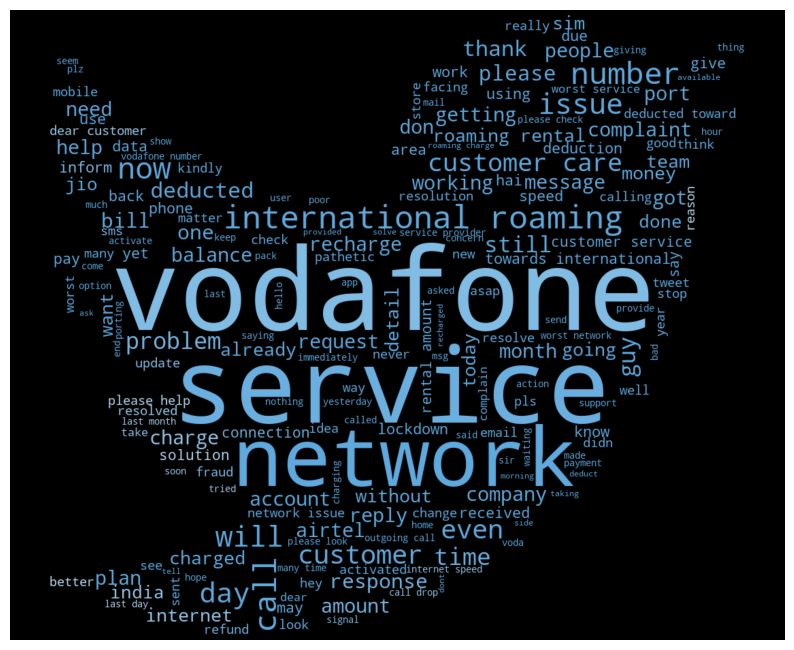

In [36]:
wordcloud(cluster_0_words)

In [37]:
cluster_1 = frame[frame['Cluster']==1]
cluster_1.head(10)

Tweet  Cluster
1  why the hell previous plan deactivated and why...        1
1  double data speed #same you vodafone pic twitt...        1
1  have already used the link and done pia please...        1
1  super fast network thank you pic twitter com k...        1
1  you can provide the speed sufficient network p...        1
1  are bhai company wale mera bhi sim sale sab je...        1
1  this happening since morning and happens every...        1
1  this your internet speed complaining again aga...        1
1  did not subscribe for any service didn receive...        1
1    again network porting out pic twitter com kmglv        1

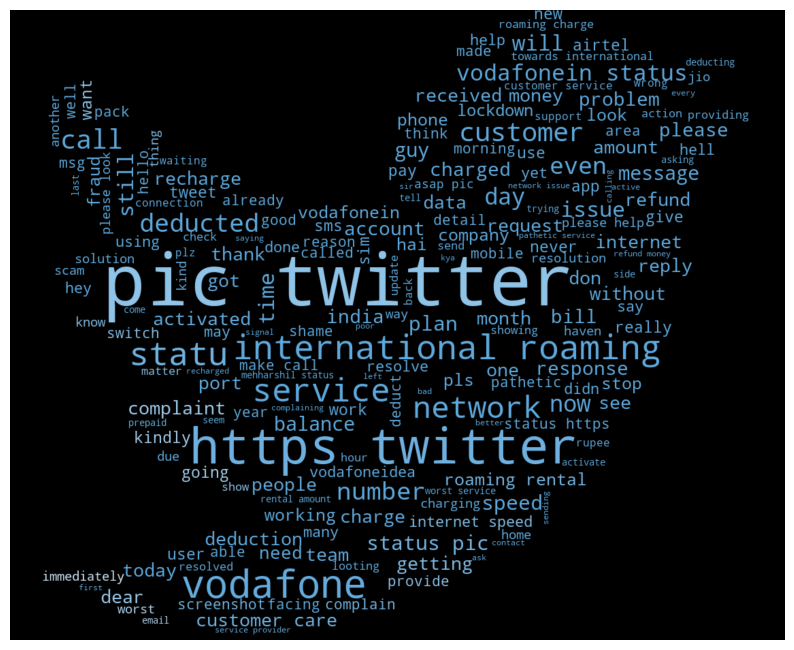

In [38]:
cluster_1_words = ' '.join(text for text in cluster_1['Tweet'])

wordcloud(cluster_1_words)

The `Topics` are all over the place using just 2 clusters. Let's increase it to 8

----

### Cluster = 8

In [39]:
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

KMeans()

In [40]:
tweets = {'Tweet': data['Clean_text'].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index= [clusters])
frame.head(10)

Tweet  Cluster
4  please check what happens this not woking sinc...        4
2  network fluctuations and speed pathetic need j...        2
4  this has been going since this absolutely unpr...        4
4  have done recharge but haven got perday with u...        4
4  but when still not received any call from cust...        4
7  mere area vodafone network nai raha hai bhitol...        7
4  thanks but have visited the website called you...        4
5  today vodafone cim deactivated without any inf...        5
5  dear vodafone have already responded your repl...        5
2  sir our market area bilkul network nahi raha c...        2

In [41]:
frame['Cluster'].value_counts()

4    8404
6    3074
5    2102
2    2067
3    1619
1    1353
7     661
0     481
Name: Cluster, dtype: int64

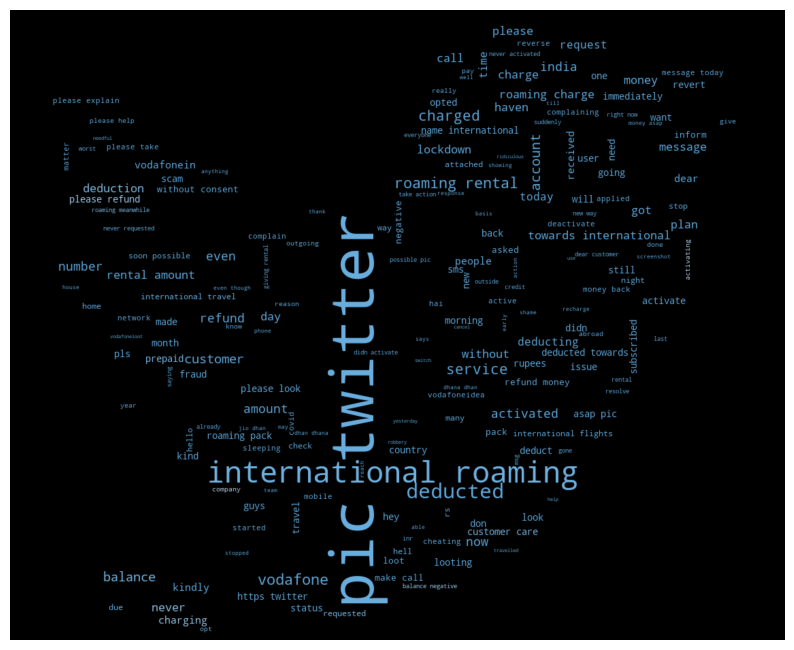

In [42]:
cluster_0 = frame[frame['Cluster']==0]
cluster_0_words = ' '.join(text for text in cluster_0['Tweet'])
wordcloud(cluster_0_words)

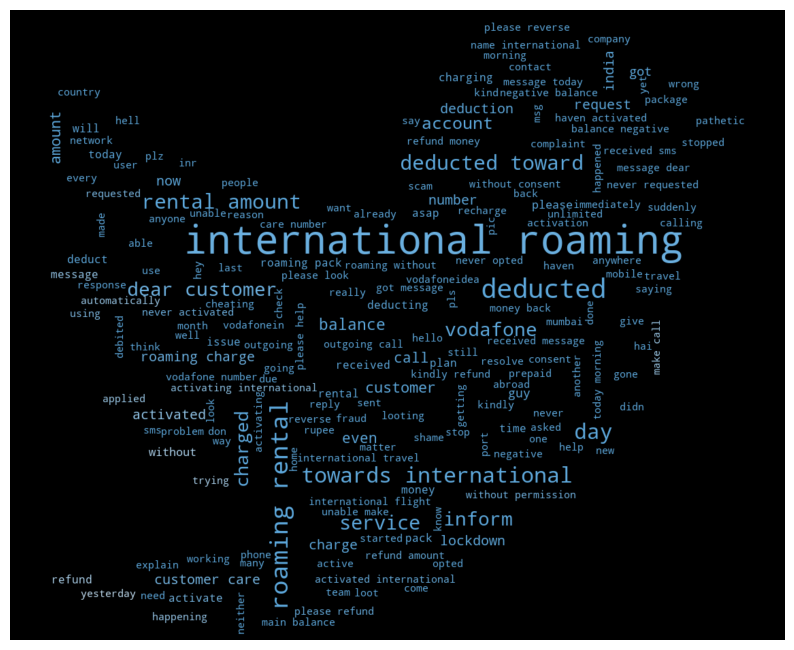

In [43]:
cluster_1 = frame[frame['Cluster']==1]
cluster_1_words = ' '.join(text for text in cluster_1['Tweet'])
wordcloud(cluster_1_words)

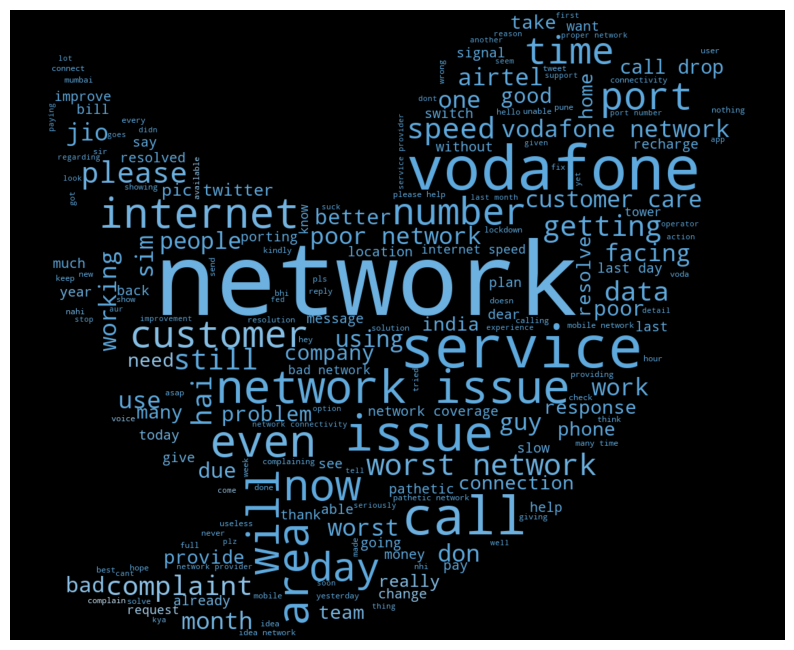

In [44]:
cluster_2 = frame[frame['Cluster']==2]
cluster_2_words = ' '.join(text for text in cluster_2['Tweet'])
wordcloud(cluster_2_words)

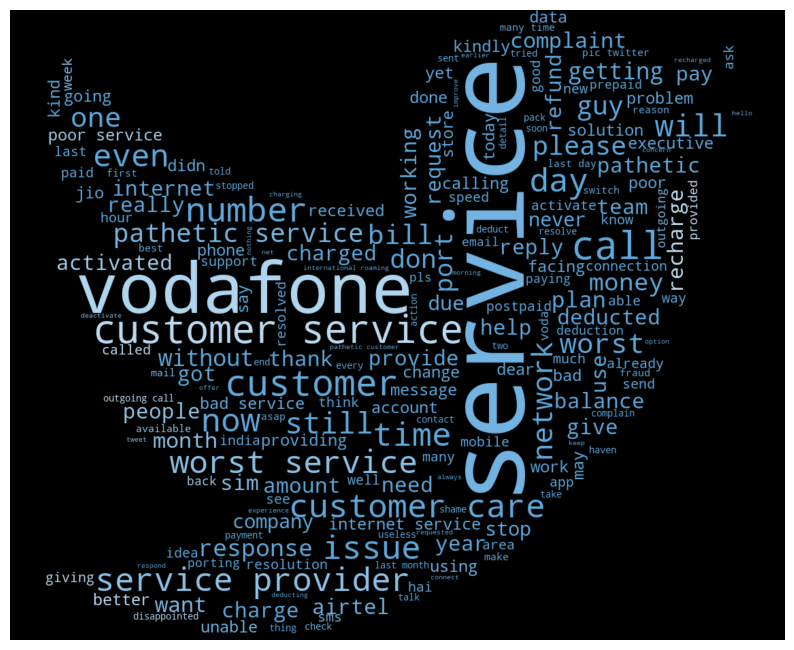

In [45]:
cluster_3 = frame[frame['Cluster']==3]
cluster_3_words = ' '.join(text for text in cluster_3['Tweet'])
wordcloud(cluster_3_words)

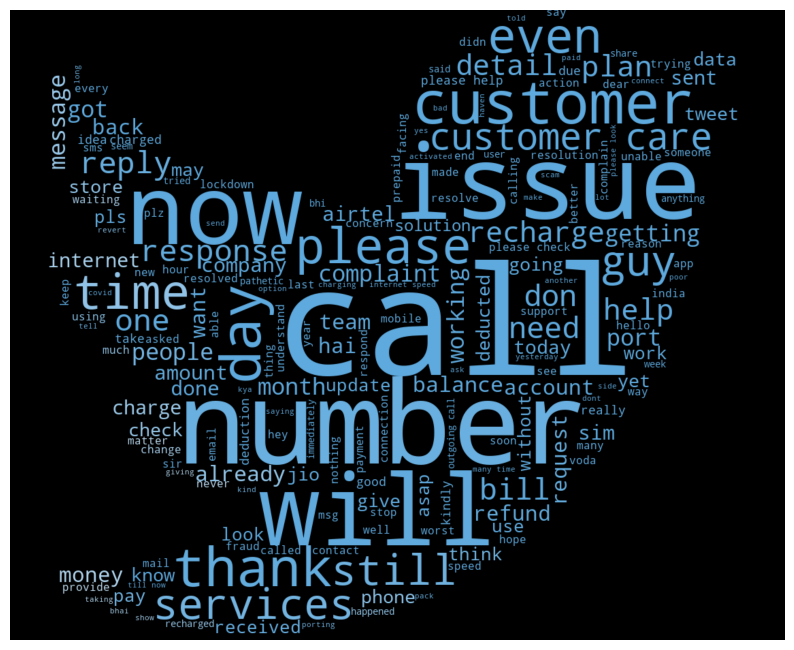

In [46]:
cluster_4 = frame[frame['Cluster']==4]
cluster_4_words = ' '.join(text for text in cluster_4['Tweet'])
wordcloud(cluster_4_words)

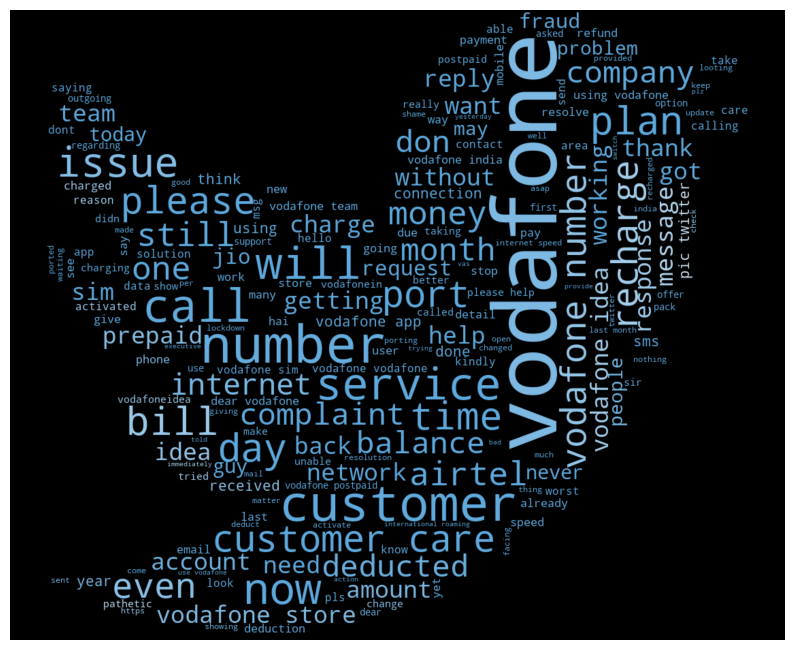

In [47]:
cluster_5 = frame[frame['Cluster']==5]
cluster_5_words = ' '.join(text for text in cluster_5['Tweet'])
wordcloud(cluster_5_words)

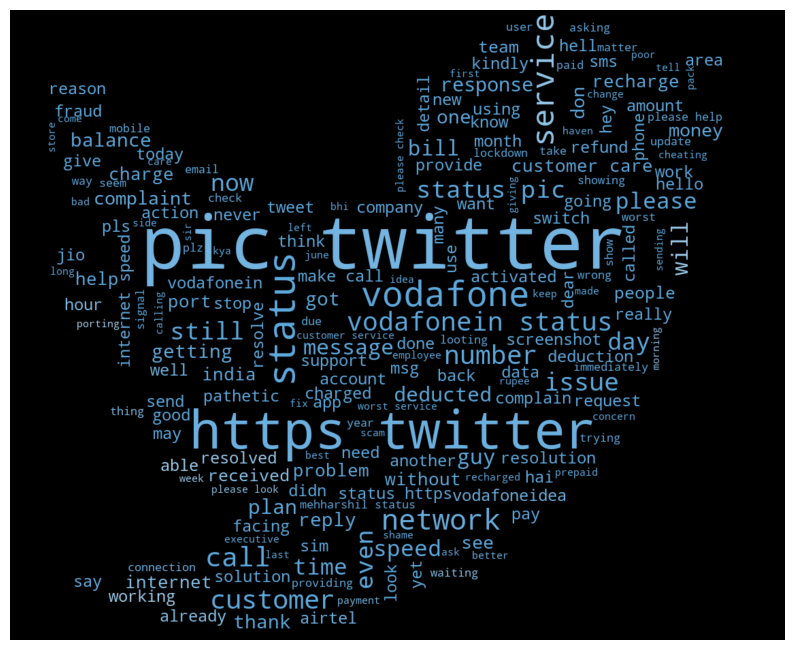

In [48]:
cluster_6 = frame[frame['Cluster']==6]
cluster_6_words = ' '.join(text for text in cluster_6['Tweet'])
wordcloud(cluster_6_words)

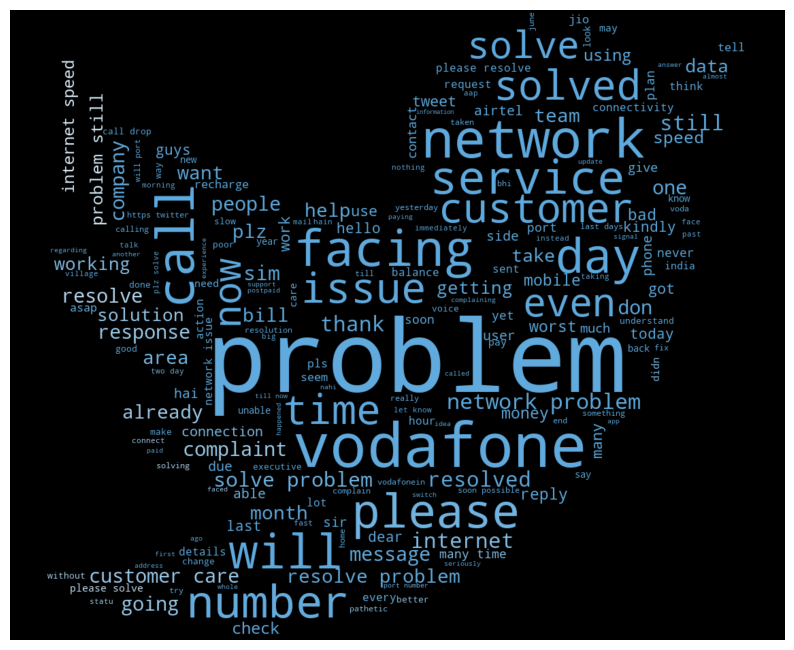

In [49]:
cluster_7 = frame[frame['Cluster']==7]
cluster_7_words = ' '.join(text for text in cluster_7['Tweet'])
wordcloud(cluster_7_words)

In [50]:
frame.to_csv('clustered_tweets.csv')

## Finding the Optimal Cluster number

In [51]:
def identify_topics(data, desc_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters)
    km.fit(desc_matrix)
    clusters = km.labels_.tolist()
    tweets = {'Tweet': data['Clean_text'].tolist(), 'Cluster': clusters}
    frame = pd.DataFrame(tweets, index= [clusters])
    print(frame['Cluster'].value_counts())
    
    for cluster in range(num_clusters):
        cluster_words = ' '.join(text for text in frame[frame['Cluster']== cluster]['Tweet'])
        wordcloud(cluster_words)

1    12247
3     3472
0     2400
2     1642
Name: Cluster, dtype: int64


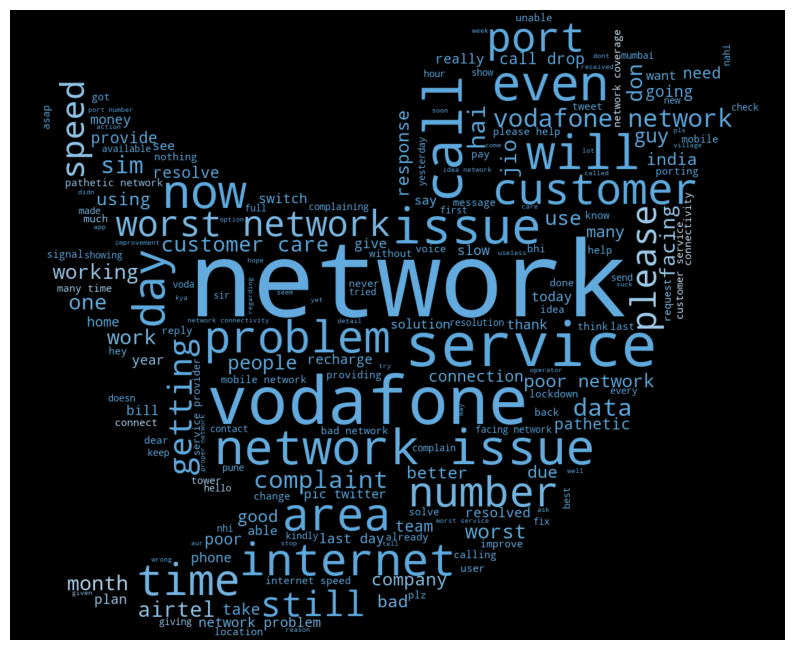

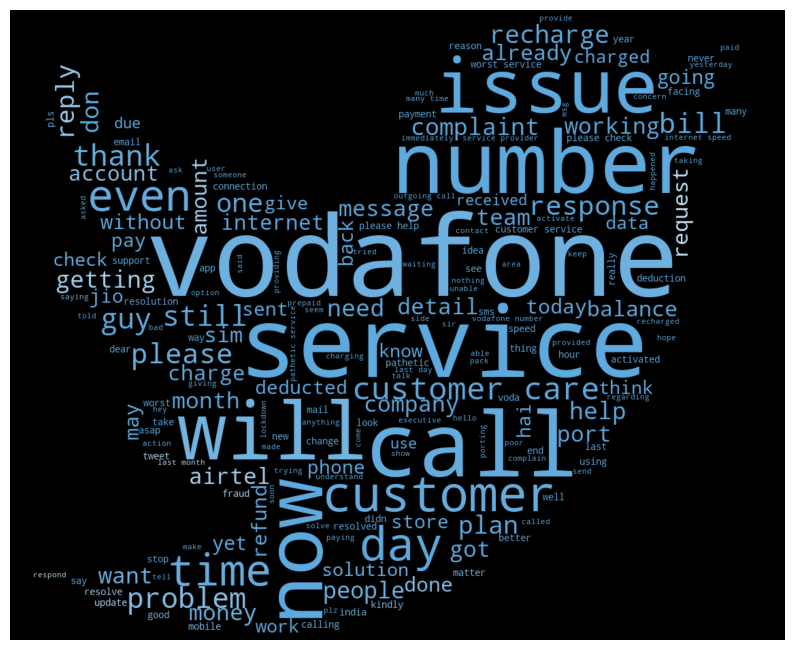

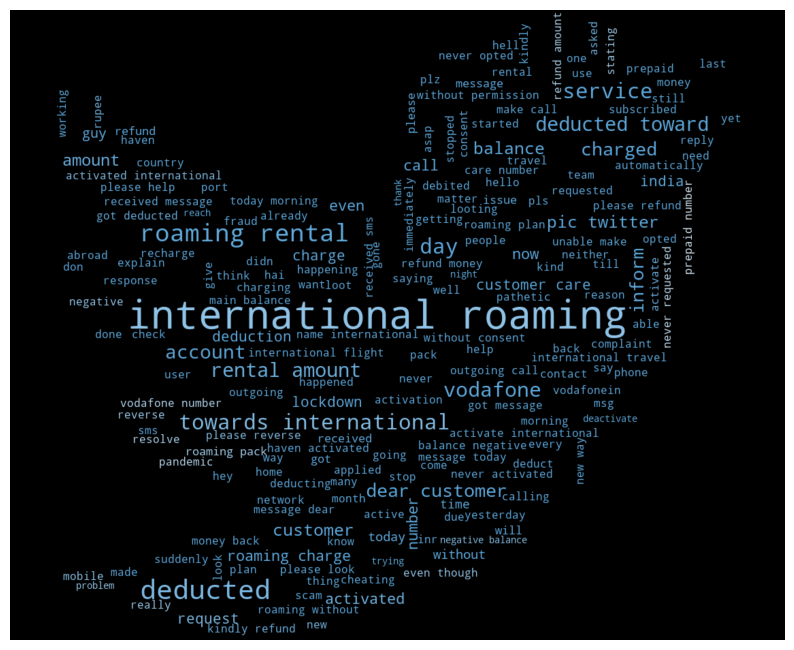

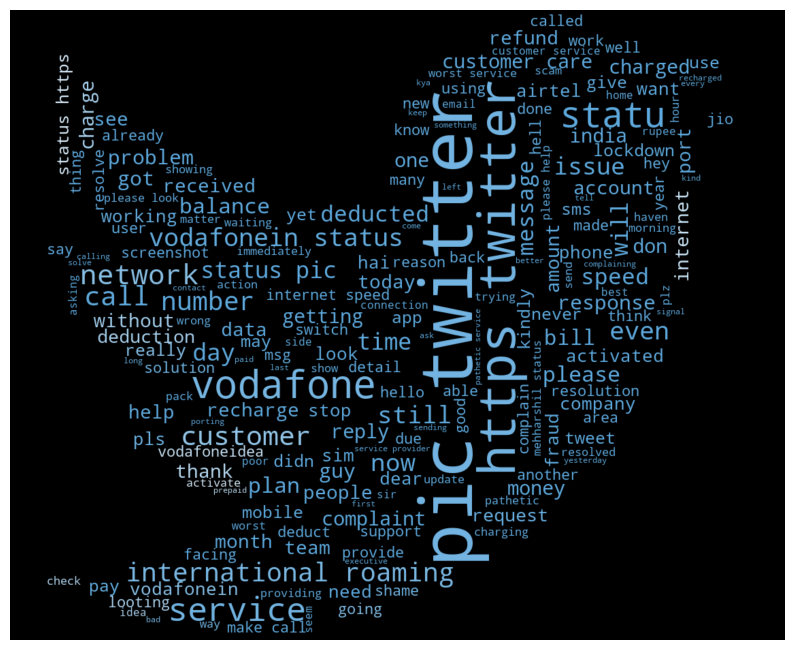

In [52]:
identify_topics(data, desc_matrix, 4)

0    10950
5     3376
3     2081
2     1592
4     1216
1      546
Name: Cluster, dtype: int64


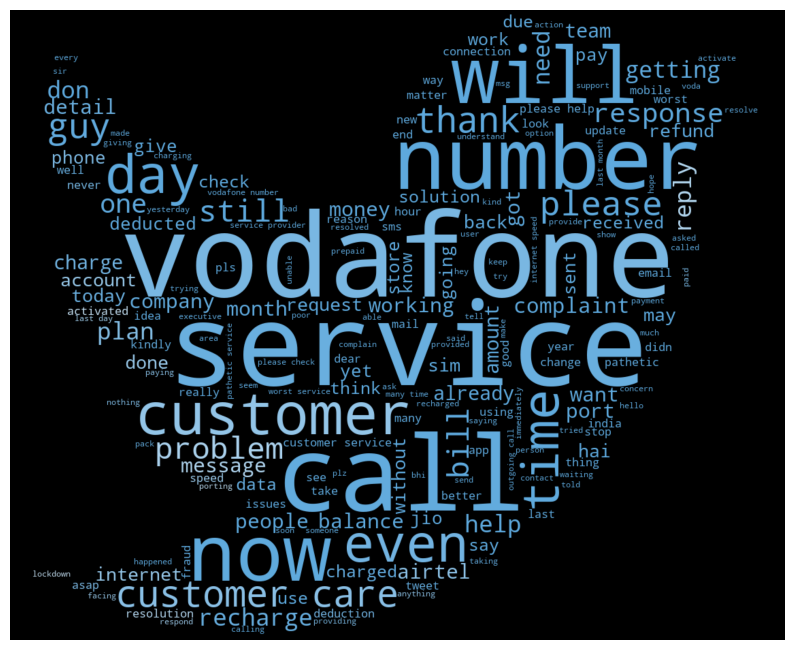

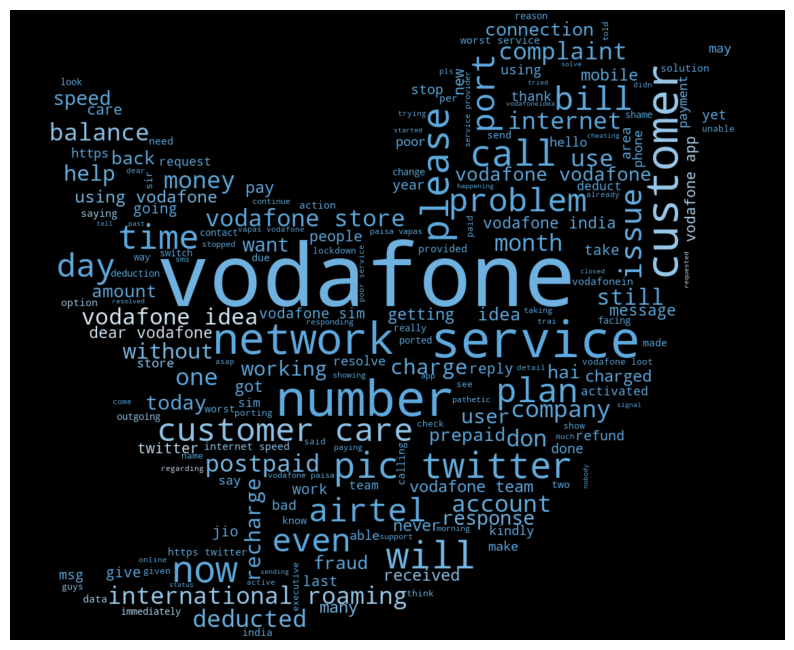

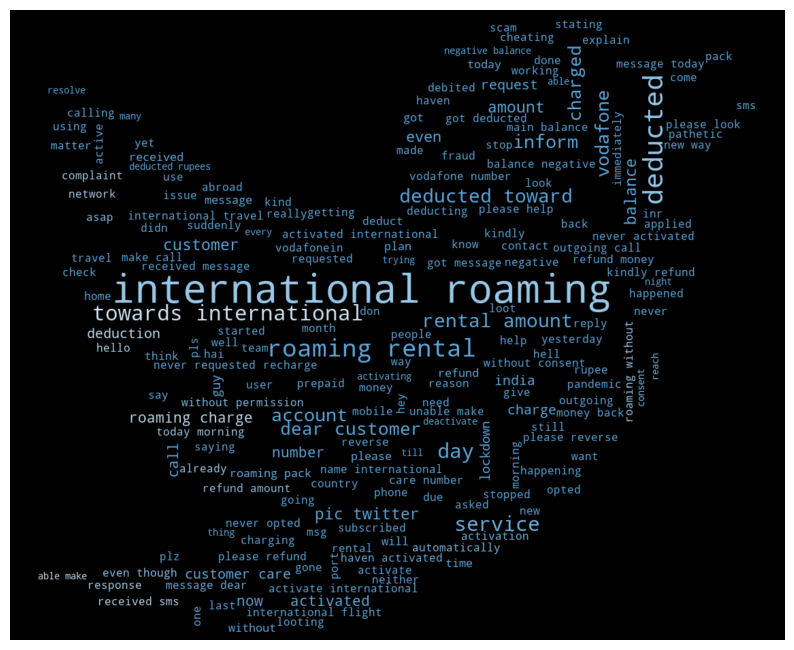

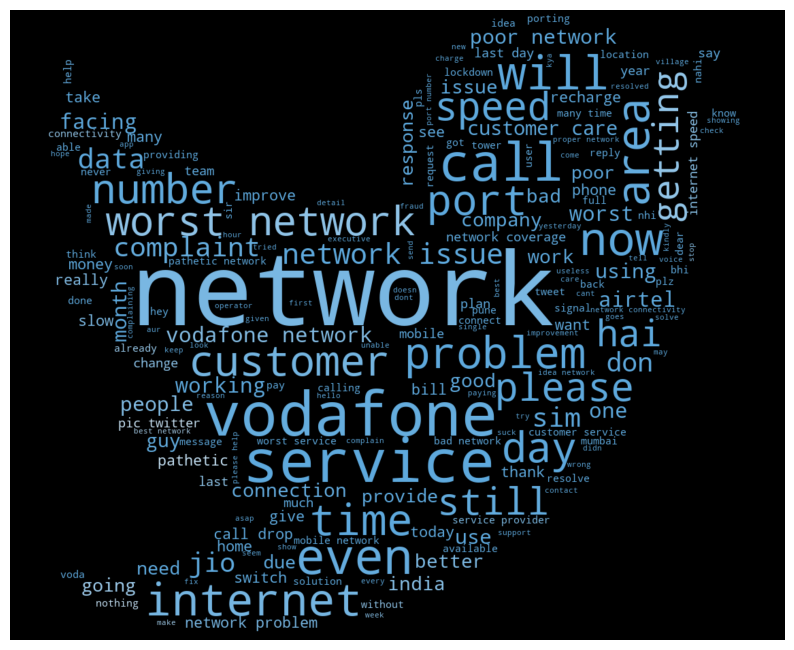

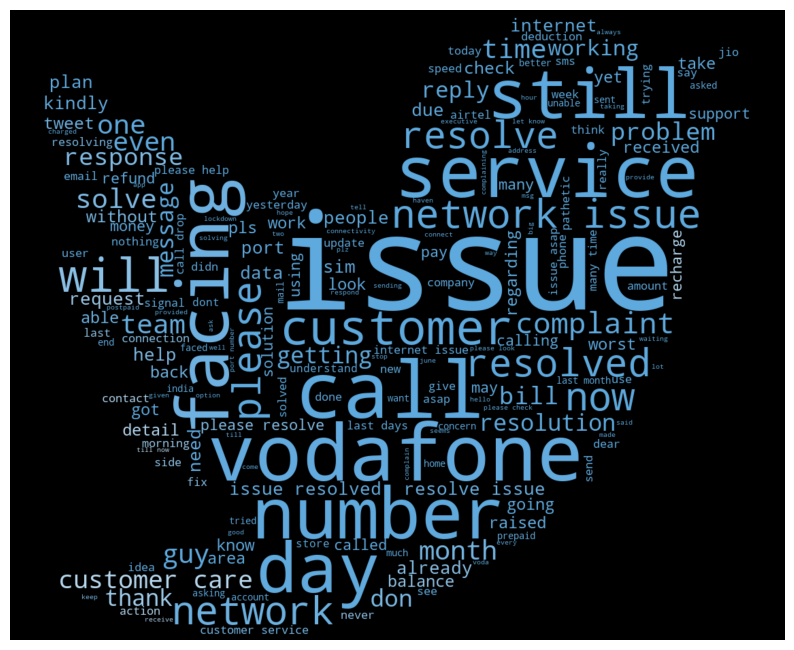

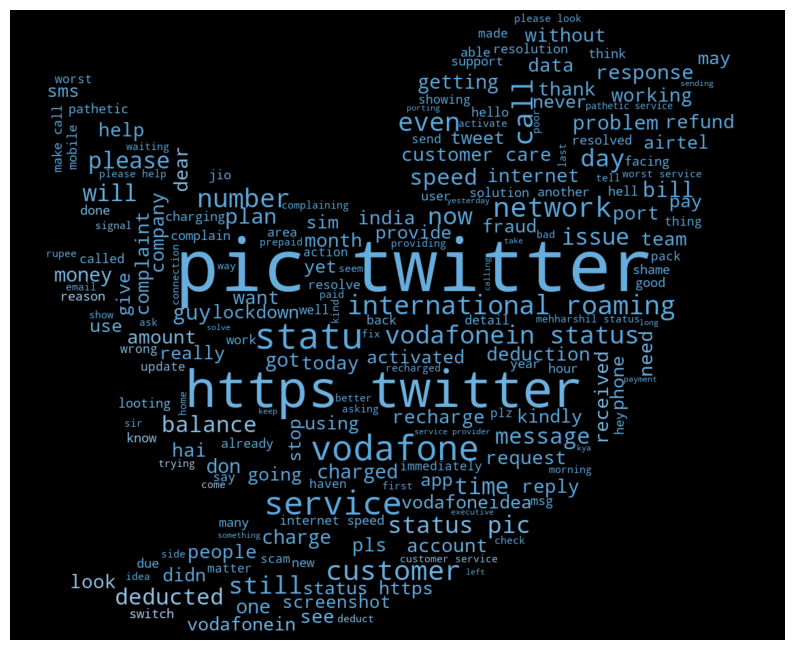

In [53]:
identify_topics(data, desc_matrix, 6)

`6` seems to be a good number of clusters

In [54]:
frame.to_csv('clustered_tweets.csv')